In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1 - Data Visualization

df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

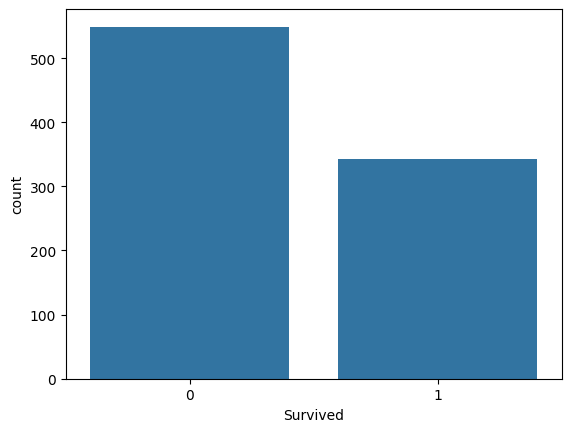

In [5]:
sns.countplot(x="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

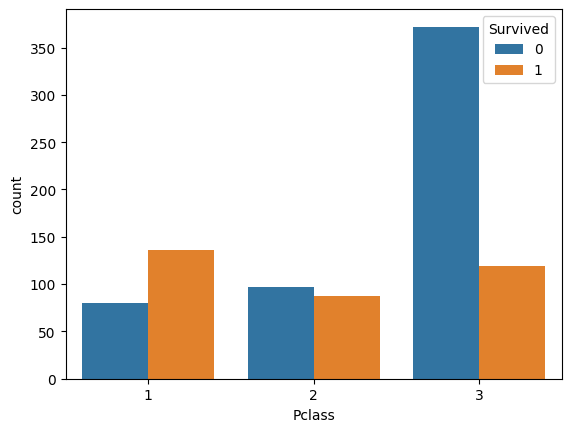

In [6]:
sns.countplot(x="Pclass", hue="Survived", data=df)

<Axes: xlabel='Embarked', ylabel='count'>

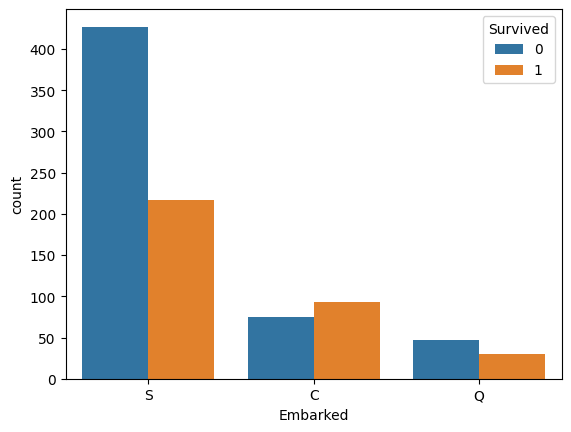

In [7]:
sns.countplot(x='Embarked', hue='Survived', data=df)

<Axes: xlabel='Age', ylabel='Count'>

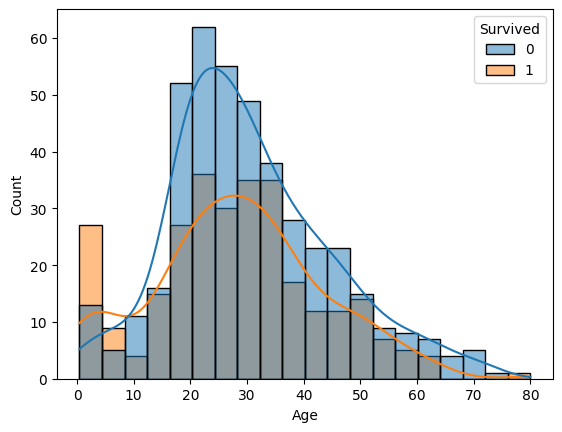

In [8]:
sns.histplot(data=df, x="Age", bins=20, hue="Survived", kde=True)

In [9]:
# 2 - Data Cleaning

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most common port)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin — too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Drop irrelevant columns that won’t help model prediction
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

/tmp/ipykernel_75011/1484059249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_75011/1484059249.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [11]:
# Change categorical data to numbers

df= pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)

In [12]:
# 3 - Train & Evaluate a Classifier

X = df.drop('Survived', axis=1)
y = df['Survived']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

fmodel = RandomForestClassifier(random_state=42)
fmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = fmodel.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8156424581005587
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Confusion Matrix: [[90 15]
 [18 56]]


In [17]:
# 4 - Training & Evaluating a second classifier

from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression(max_iter=2000, random_state=42)

lmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [18]:
y_pred_log = lmodel.predict(X_test)

In [19]:
# accuracy statistics

print('Accuracy Score:', accuracy_score(y_test, y_pred_log))
print('Classification Report:', classification_report(y_test, y_pred_log))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_log))

Accuracy Score: 0.8100558659217877
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix: [[90 15]
 [19 55]]


In [20]:
# 5 - Prediction on actual data (test.csv)

df_real= pd.read_csv('test.csv')

In [21]:
df_real.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
# Fill missing Age values with the median
df_real['Age'].fillna(df_real['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most common port)
df_real['Fare'].fillna(df_real['Fare'].mode()[0], inplace=True)

# Drop Cabin — too many missing values
df_real.drop('Cabin', axis=1, inplace=True)

# Drop irrelevant columns that won’t help model prediction
df_real.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

/tmp/ipykernel_75011/1124727669.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real['Age'].fillna(df_real['Age'].median(), inplace=True)
/tmp/ipykernel_75011/1124727669.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [23]:
df_real.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
df_real= pd.get_dummies(df_real, columns=['Embarked', 'Sex'], drop_first=True)

In [27]:
# predicting directly on df_real 

y_fpred = fmodel.predict(df_real)

In [28]:
submission = pd.DataFrame({
    'PassengerId': pd.read_csv("test.csv")['PassengerId'],
    'Survived': y_fpred
})
submission.to_csv("submission.csv", index=False)